## STL Analysis- Airbnb

**Dataset- Seattle Airbnb Open Data, https://www.kaggle.com/datasets/airbnb/seattle**

The dataset consists of 3 '.csv' files- calendar.csv, reviews.csv, listings.csv. 

***Aim- To understand STL analysis and apply it to Airbnb Dataset***

### Understanding STL

Seasonal decomposition is a statistical technique for breaking down a time series into its essential components, which often include the trend, seasonal patterns, and residual (or error) components. The goal is to separate the different sources of variation within the data to understand better and analyze each component independently. The fundamental components are:
* Trend: The underlying long-term progression or direction in the data.
* Seasonal: The repeating patterns or cycles that occur at fixed intervals like daily, monthly or yearly.
* Residual: The random fluctuations or noise in the data that cannot be attributed to the trend or seasonal patterns.


Seasonal-trend decomposition using Loess (STL) is a specific decomposition method that employs the Loess technique to separate a time series into its trend, seasonal, and residual components. Locally Weighted Scatterplot Smoothing or Loess is a non-parametric regression method used for smoothing data

The period parameter in STL analysis plays a crucial role as it defines the length of the seasonality. Here’s how different periods affect STL analysis :
* 'Best Fit Period: When the period correctly matches the inherent seasonality of the data, the seasonal component is accurately captured, making the decomposition reliable.
* Too Short Period: If the period is shorter than the actual seasonality, the seasonal component might capture noise or incorrect patterns, leading to inaccurate decomposition.
* Too Long Period: If the period is longer than the actual seasonality, the seasonal component might be overly smoothed, missing some seasonal variations and distorting the trend component.

***Refer to 'Airbnb_time_series.ipynb' to understand the dataset and steps of data preperation***

### Importing and Formatting Data

**Dataset Description**

1. Calendar: Daily price and availability for listings in Seattle (`listing_id`, `date`, `availability`, `price`).
2. Listings: Detailed listing information.
3. Reviews: Reviews for each listing.

**Analysis Focus**

Focus on "Calendar" for price fluctuation analysis.

**Data Preparation Steps**

1. Handle missing `price` values (unavailable listings).
2. Convert `price` to float and `date` to datetime.

In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import STL
#import libraries

In [3]:
calendar_path = "calendar.csv"

if os.path.isfile(calendar_path):
    calendar= pd.read_csv(calendar_path)

In [4]:
calendar= calendar.dropna()

In [5]:
calendar['price'] = calendar['price'].replace('[\$,]', '', regex=True).astype(float) #change price to float data type

In [6]:
calendar['date'] = pd.to_datetime(calendar['date']) #change date to datetime data type

### STL Anaylsis

In [15]:
avg_price_by_date = calendar.groupby('date')['price'].mean()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


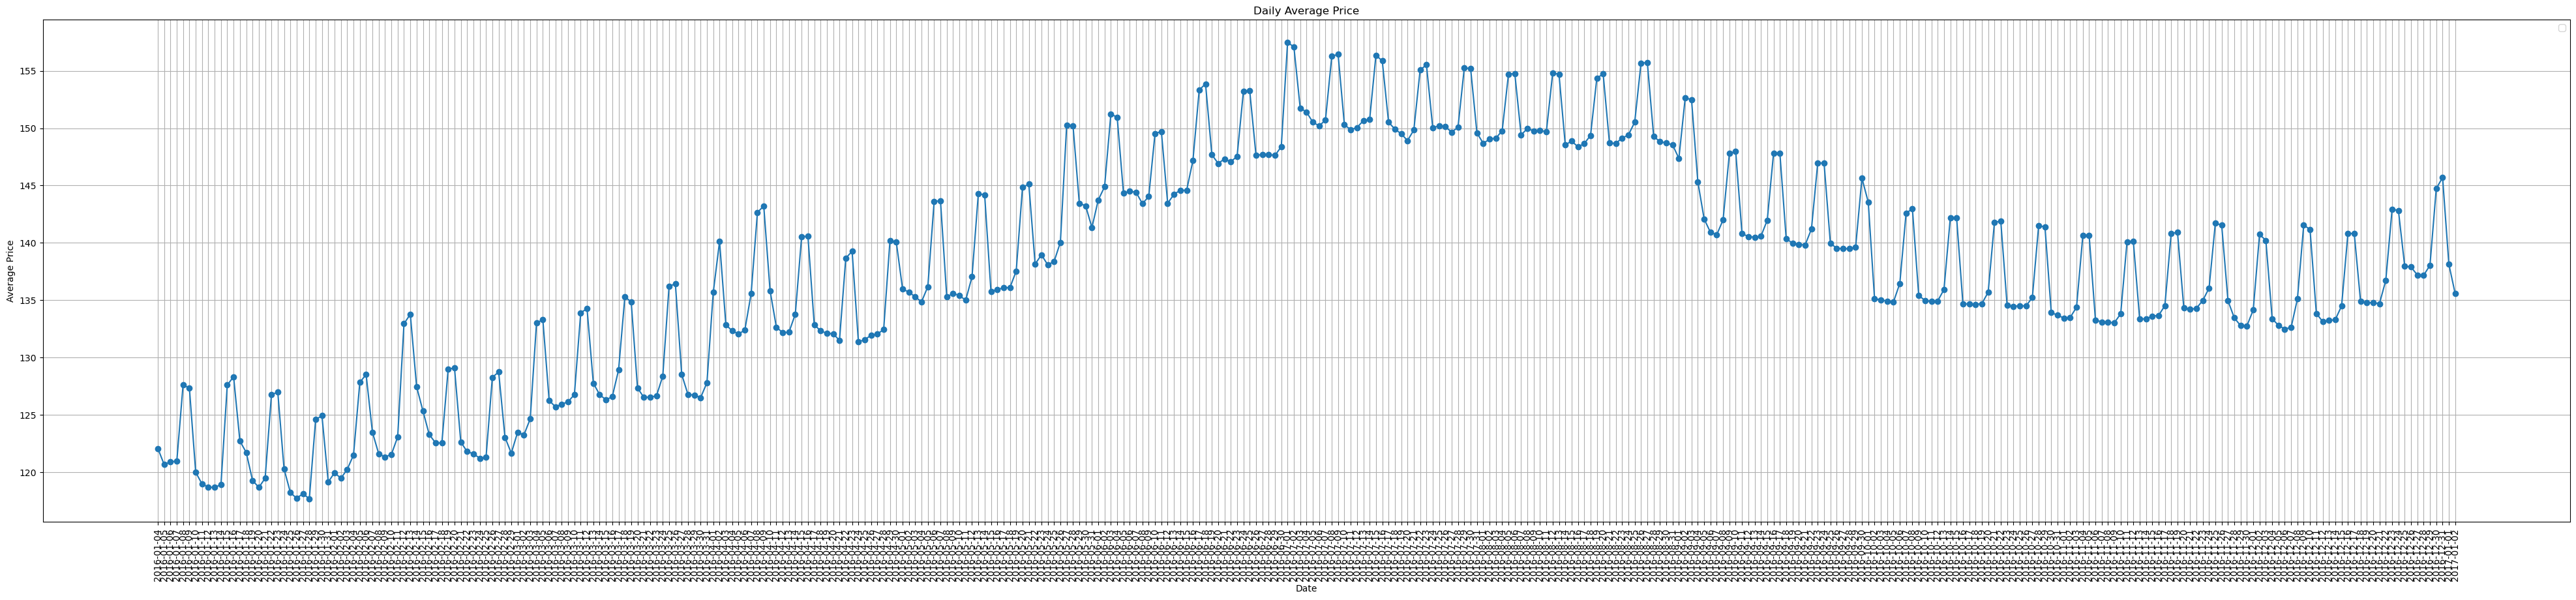

In [26]:
calendar['month'] = calendar['date'].dt.month
calendar['year'] = calendar['date'].dt.year
calendar['day'] = calendar['date'].dt.day

daily_avg = calendar.groupby(['date'])['price'].mean().reset_index()

plt.figure(figsize=(50,10))

plt.plot(daily_avg['date'], daily_avg['price'], marker='o')

plt.title('Daily Average Price')
plt.xticks(daily_avg['date'], [date.strftime('%Y-%m-%d') for date in daily_avg['date']], rotation=90)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.grid(True)
plt.show()

**Depicts the average price of the various listing in Seattle over the course of the year**

As discussed earlier the aim of STL is to breakdown timeseries data into 3 components- the overall trend, the periodicity and the outliers. 

From the above we can understand the overall trend consists of a steady rise from January to a peak in August and then a steady descent from Septemeber to December depicting the price rise and drop through the seasons. 

The periodicity is termed as "Season" in the module which makes you inaccurately believe that the period expected is the four seasons or 3 month intervals. Let us see the effect of this period. 

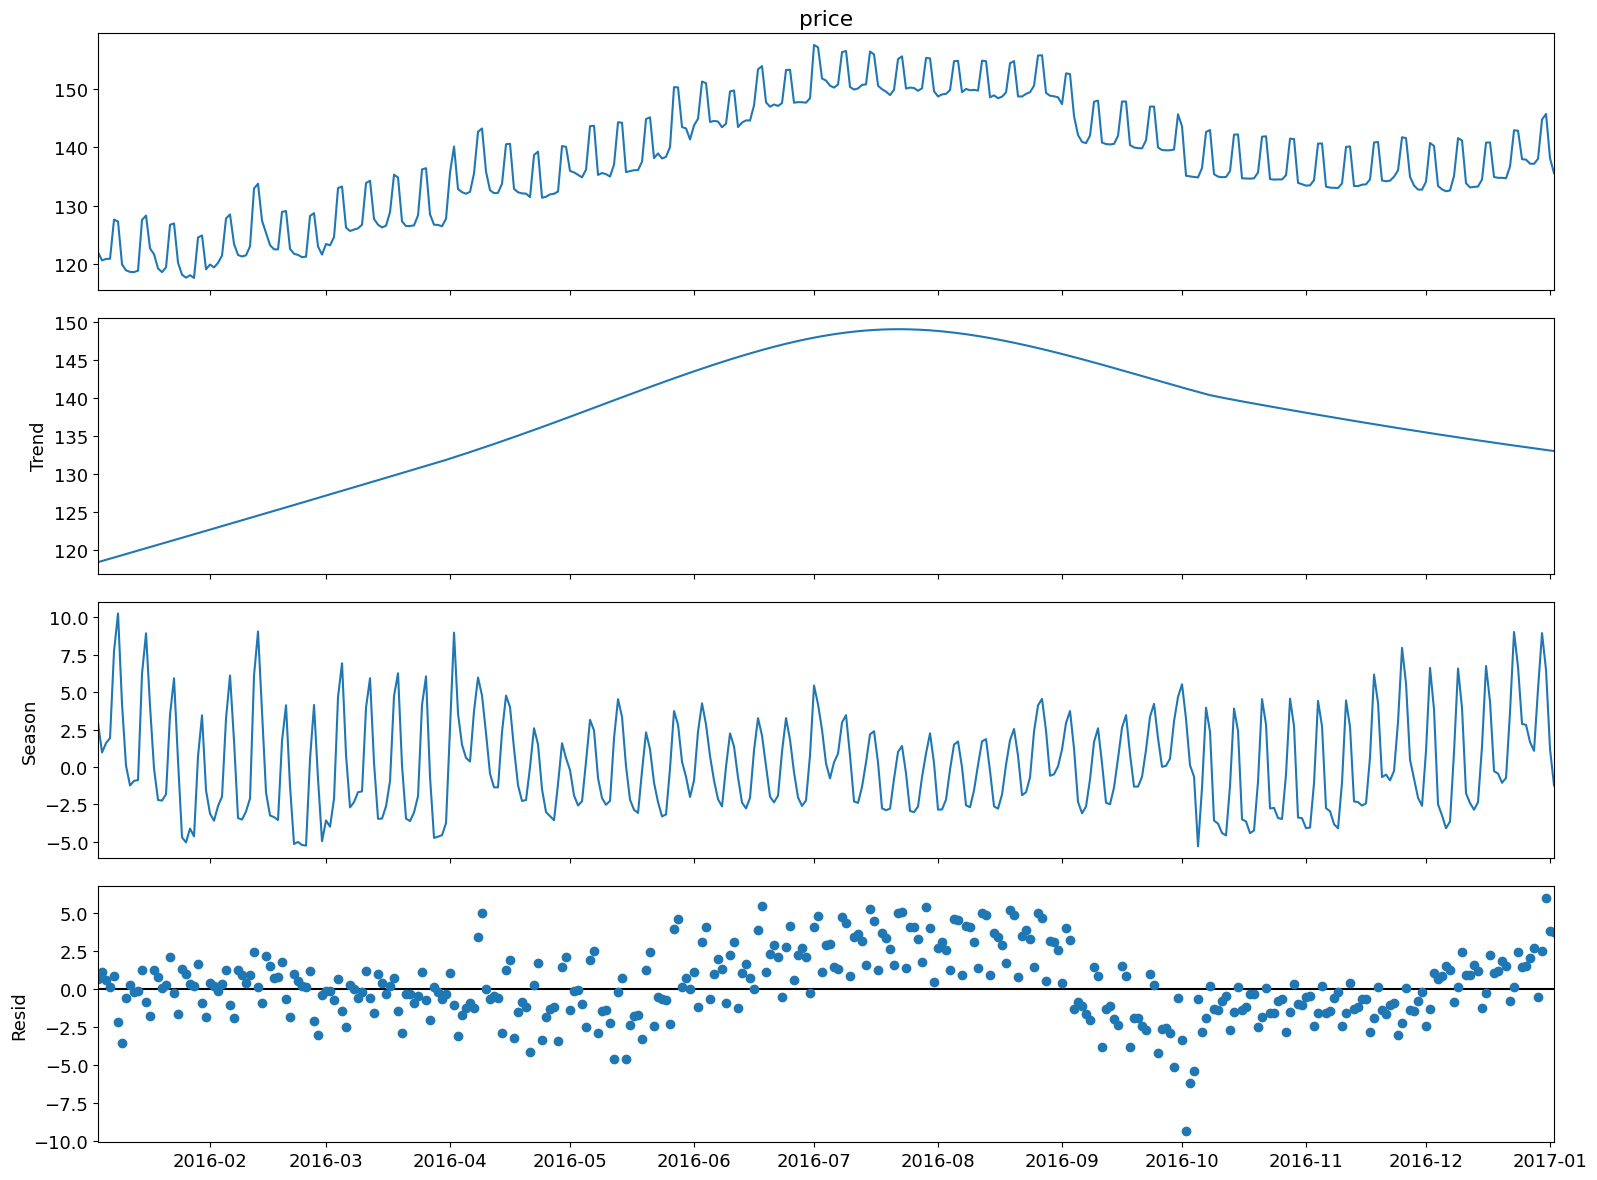

In [21]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)
stl = STL(avg_price_by_date, period=90)
res = stl.fit()
fig = res.plot()

plt.gcf()  

plt.show()

**Frequently misundestood-** We must note that STL is a tool, a tool to understand and visualise time series data. There is no 'right' choice of period, whatever period you may choose, the tool will produce relevant information pertaining to that period. But choosing the period that the data inherently posseses allows us to predict and accurately describe the data. 

Taking a look at the analysis where the period is 1 season or 3 months we can note-
1. Trend component is overly smoothened, it shows a linear growth from January to June which does not accurately describe the nuances of the data. 
2. We would hope to see a recurring pattern is the "Season" component, i.e. within the period given there is a cycle of rise and fall that occurs throughout the dataset. 
3. We notice a high number of outliers is the "Residual" component, that indicates that these two factors(yearly trend and fluctuation through the season) can not accurtely descibe the data. 

From our prior understanding of STL we can conclude that a 90 day period is 'too long' for the data. We can try again with a smaller period 

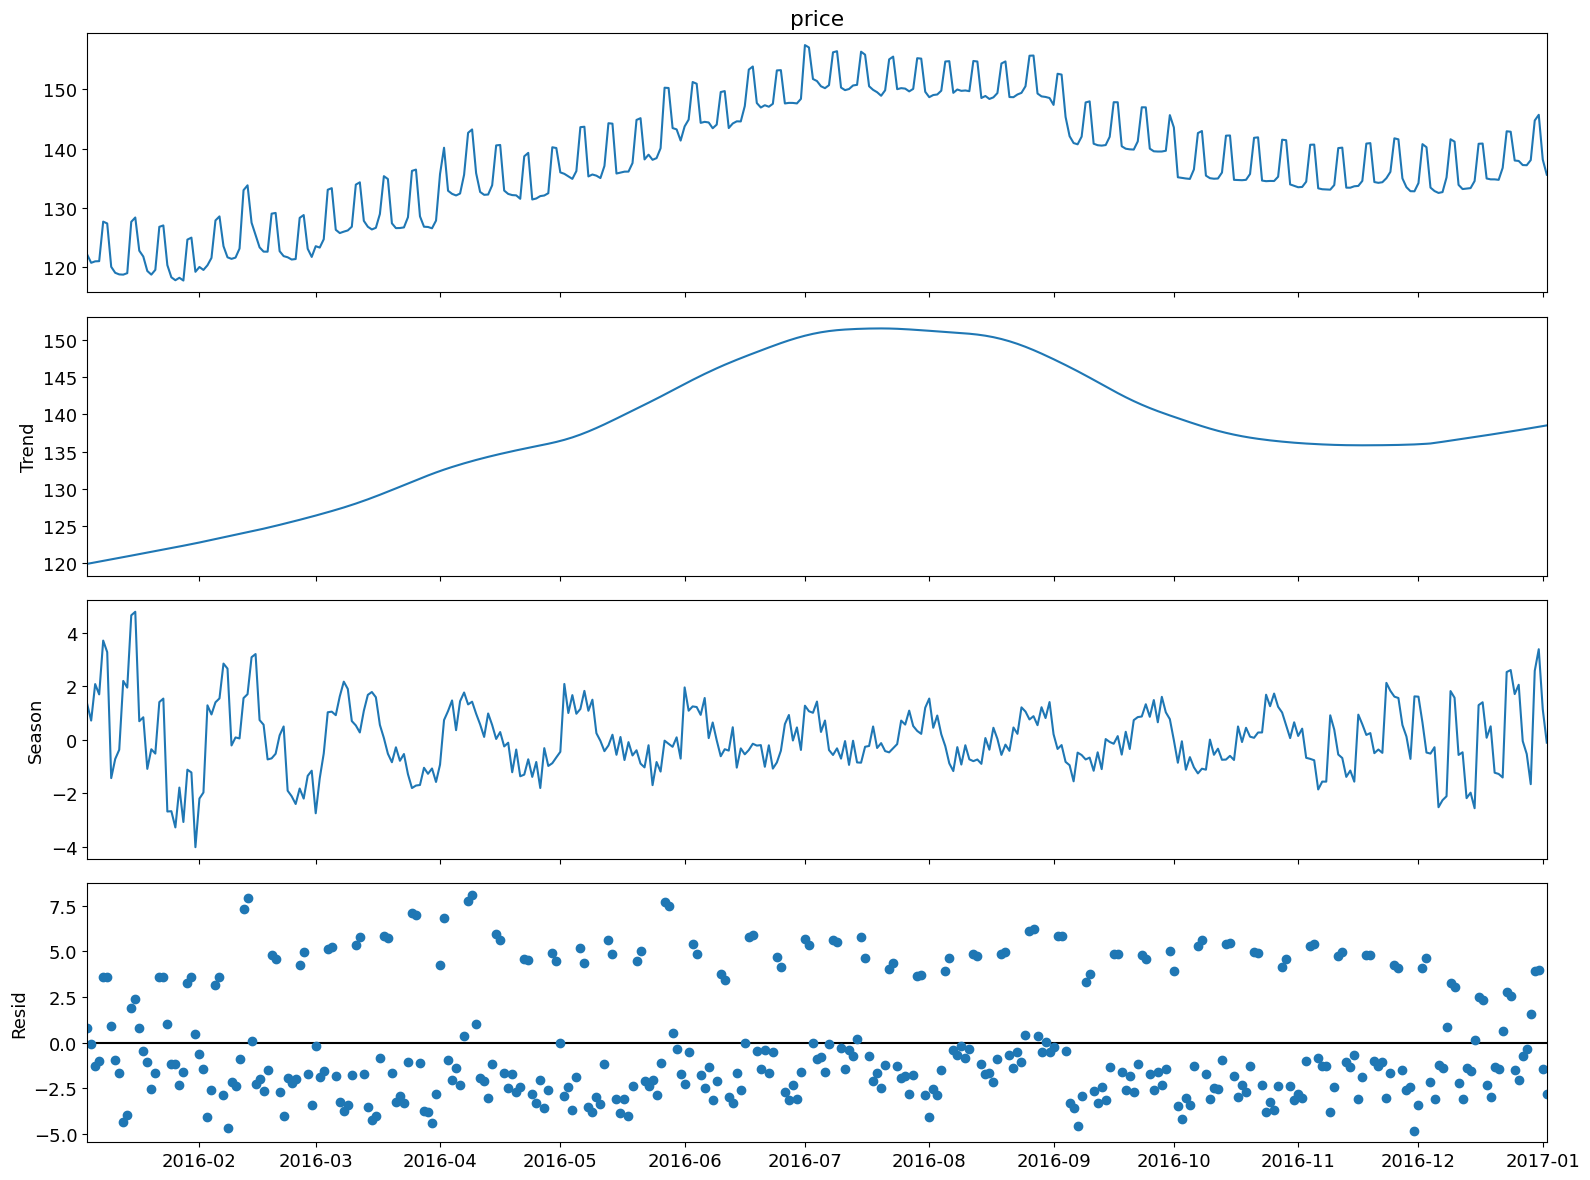

In [24]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)
stl = STL(avg_price_by_date, period=30)
res = stl.fit()
fig = res.plot()

plt.show()

Observations from the previous still hold true indicating that 30 days is too long too. But we can note:
* Trend is less smoothened when compared to previous
* The season shows the vague indications of a pattern
* Amount of unpredictable outliers has decreased

Looking further into 'Season' helps us find the 'Best-Fit' period for this data. We can see 4 peaks and subsequent crests in the month of January and February, this pattern does not  through the rest of the months. But this gives the idea of taking the period to be one week as a month consists of 4 weeks thus it could co-incide with a weekly pattern. 

![understanding stl](./stl_month.jpg)

Another way to approach the problem of unearthing the inherent periodicity of the data is to better understand the business and the data

The data consists of prices of various listings through out Seattle over the course of one year. Prices are determined by demand, higher demand will lead to higher prices. The overall demand rises when the weather is pleasant i.e. the summer months and drops when it is freezing. But a smaller trend can also be noticed, every week the demand increased during the weekends and drops in the weekdays and this is reflected in the price. Thus the period we have been searching for is 7days as in one weeks time the prices complete one cycle of variation. 

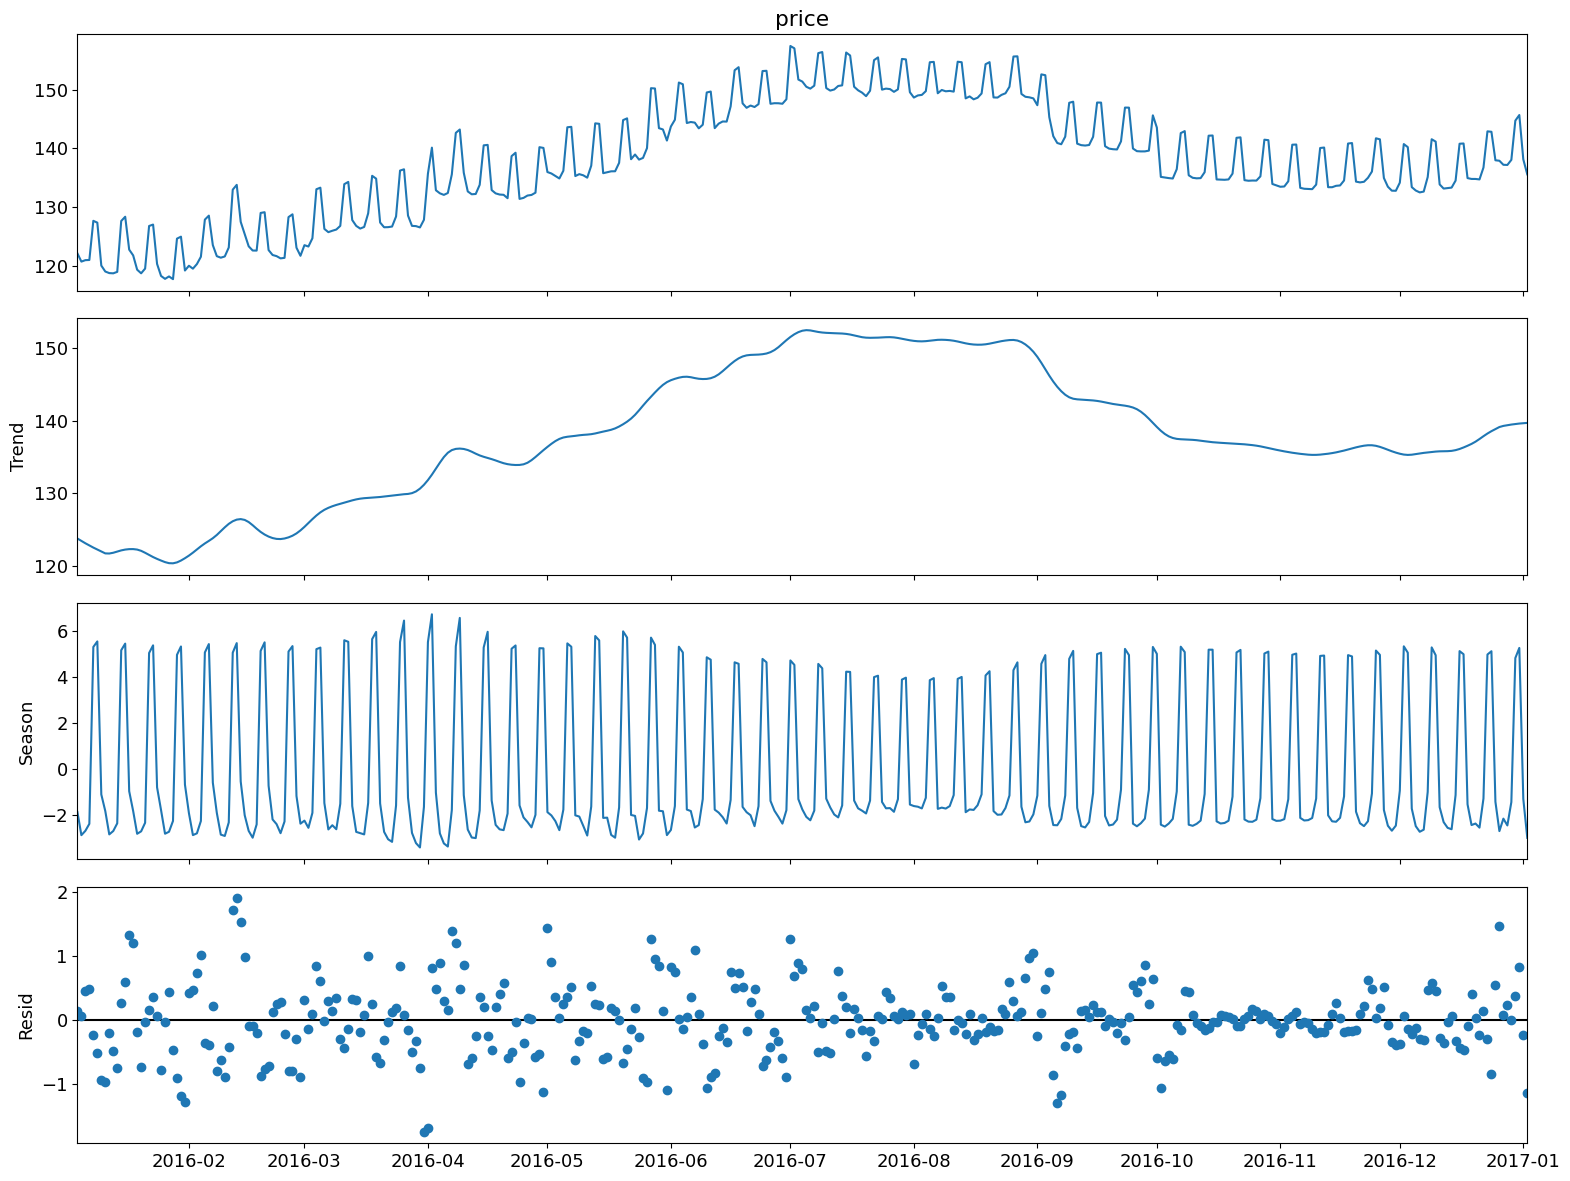

In [25]:
plt.rc("figure", figsize=(16, 12))
plt.rc("font", size=13)
stl = STL(avg_price_by_date, period=7)
res = stl.fit()
fig = res.plot()

plt.show()

Understandings from the above-
* Trend- Shows the average prices tending upward from January to August and then going downwards after September, it is not overly smoothened and maintains the information of fluctuations through the year. 
* Seasonality- The period was set to 7 i.e. weekly. We see that the prices fluctuate substantially during the week, reaching a peak during the weekends and then taking a sharp turn downwards. We see this weekly fluctuation occurs every week and roughly to the same extent as the peaks reach a similar height. The pattern continues indicating that 7 days is the inherent periodicity present in the data. 
* Residual- Shows the data points that are irregular and cannot predicted by the above two

#### **Conclusion**

STL is a valuable tool to decompose time series data into its various components. Applying STL on Airbnb Dataset we can better understand the components of price fluctuations. It boils down to a overall trend through the year that is correlated to the weather of Seattle and a weekly fluctuation in data due to the increase in demand on weekends. We can also see that these components do not predict it accurately and some fluxtuations do occur due to various other factors such as national holidays, sporting events, natural disasters etc. 

*It would be valuable to analyse mutliple years of data on the prices of airbnbs to see if the yearly trend is also periodic. This would support the conclusion of seasonal variance.*